### Higher Diploma in Science - Data Analytics 2020/21

### Fundamentals of Data Analysis Project

#### Prepared by: Fiona Lee 
#### Due Date - 8 January 2021


***

### Fundamentals of Data Analysis - Project Instructions:

In  this  project  you  must  perform  and  explain  simple  linear  regression  using  Python on the power production dataset available on Moodle.  

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, thefollowing items:

1.  Jupyter notebook that performs simple linear regression on the data set.
2.  In that notebook, an explanation of your regression and an analysis of its accuracy.
3.  Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. 

***

### Import Modules 
***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

<BR>

### Import the Dataset
***

In [2]:
df = pd.read_csv('Wind-Power.csv')
pd.set_option('max_colwidth',100)
print(df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [3]:
#Check if characters in the data imported is the same type
print(df.dtypes)

speed    float64
power    float64
dtype: object


In [4]:
#Check if there are any empty cells in the dataframe
pd.set_option("display.max_rows", 500)# Option to display all entries
df.style.highlight_null(null_color='red'); #highlight any null values in red
#print(df.isnull()) #Option to print the dataset

In [5]:
#Check for corrupt data
print ("power shape = ",df.shape)

power shape =  (500, 2)


In [6]:
#Re-name the columns from the original dataset
df.rename(columns={'speed':'Speed_Mph'},inplace = True)
df.rename(columns={'power':'Power_KWph'},inplace = True)

In [7]:
#Add Power/Speed Column
df['Power:Speed'] = (df ['Power_KWph'] / df ['Speed_Mph']) #Add Power/Speed Column
df.replace(to_replace = np.nan, value = 0.00)  
pd.set_option("display.precision", 3)
df.style.set_properties(subset=["Power_KWph", "Speed_Mph"], **{'text-align': 'centre'});
#https://www.codegrepper.com/code-examples/python/how+to+align+column+name+to+center+in+pandas+dataframe
#del df['power/speed']; #delete additional column

<BR>

### High Level Analysis
***

In [8]:
#Show the entire dataset sorted by Power:Speed Ratio
pd.set_option("display.max_rows", None)#Show the entire dataset
pd.set_option("display.precision", 3) #Round the results to 3 decimal places
df.sort_values(by=['Speed_Mph'], inplace=True, ascending=True)#Sort the dataset in descending order
#https://datatofish.com/sort-pandas-dataframe/
df.style.set_properties(subset = ["Power KWph", "Speed Mph"], **{'text-align': 'right'})
#https://www.kite.com/python/answers/how-to-print-an-entire-pandas-dataframe-in-python
print ("")
df[['Speed_Mph','Power_KWph','Power:Speed']]

,Speed_Mph,Power_KWph,Power:Speed
0,0.000,0.000,NaN
1,0.125,0.000,0.000
2,0.150,0.000,0.000
3,0.225,0.000,0.000
4,0.275,0.000,0.000
5,0.325,4.331,13.326
6,0.400,5.186,12.965
7,0.450,3.826,8.502
8,0.501,1.048,2.092
9,0.526,5.553,10.557


<BR>

In [9]:
#Show basic summary information
print ("")
pd.set_option("display.precision", 0)
# https://realpython.com/pandas-groupby/
(df.describe())

,Speed_Mph,Power_KWph,Power:Speed
count,500,500,499
mean,13,48,3
std,7,42,2
min,0,0,0
25%,6,5,1
50%,13,42,4
75%,19,94,5
max,25,114,14


<BR>

### Identify any Trends in the Results:

In [10]:
print("")
pd.set_option("display.precision", 2)
# https://realpython.com/pandas-groupby/
df.style.set_properties(subset = ["Power_KWph", "Speed_Mph"], **{'text-align': 'center'});
#df.groupby(['Power_KWph']).agg(['count'])

#### Analyse 49 Results where Power_KWph equals Zero:

In [11]:
df.sort_values(by=['Speed_Mph'], inplace=True, ascending=True)#Sort the dataset in descending order
#df = df.drop('Power:Speed', axis=1)
#df[df['Power_KWph'] == 0]

In [12]:
# Create a new Column identifying rows where Power_KWph = 0 and Speed_Mph > 8 and less than 55mph
def Power(row):
    if row['Power_KWph'] == 0 and row['Speed_Mph'] > 8:
        return 'Power Outage'
    if row['Power_KWph'] == 0 and row['Speed_Mph'] > 55:
        return 'Shut Down'    
    else:
        return 'Normal'
    
#To populate a column called 'Risk' in the dataframe from the results above  
df['Zero Power'] = df.apply(lambda row: Power(row), axis=1)
pd.set_option("display.precision", 3)
df.sort_values(by=['Speed_Mph'], inplace=True, ascending=False)#Sort the dataset in descending order
#df

In [13]:
#Create a dataframe (df2) for results where Power_KWph = > and and Speed_Mph > 3
pd.set_option("display.precision", 3)
df2 = df[df['Zero Power'] == 'Normal']
#df2.describe()
#df2

In [29]:
#To create data to populate a new column called 'Optimum Ratio' based on Power:Speed Ratio.
def Optimum(row):

    if row['Power:Speed'] == 0:
        return 'No Output'
    if row['Speed_Mph']== 0 and row['Power_KWph'] == 0:
        return 'No Output'
    if row['Power:Speed'] > 0 and row['Power:Speed'] < 6 and row['Speed_Mph'] < 8:
        return 'Low Wind Speed ( < 8mph)' 
    if row['Power:Speed'] > 0 and row['Power:Speed'] < 6 and row['Speed_Mph'] >= 8:
        return 'Sub Optimum'        
    if row['Power:Speed'] >= 6 and row['Power:Speed'] <= 8:
        return 'Optimum'     
    if row['Power:Speed'] > 8:
        return '> Optimum'             
    else:
        return 'null'
    
#To populate a column called 'Optimum_Ratio' in the dataframe from the results above  
pd.set_option('mode.chained_assignment', None)#Turn off chained warnings
#https://www.dataquest.io/blog/settingwithcopywarning/
df2['Optimum_Ratio'] = df.apply(lambda row: Optimum(row), axis=1) 
df2.groupby(['Optimum_Ratio']).count()

,Speed_Mph,Power_KWph,Power:Speed,Zero Power
Optimum_Ratio,,,,
> Optimum,10,10,10,10
Low Wind Speed ( < 8mph),116,116,116,116
No Output,35,35,34,35
Optimum,2,2,2,2
Sub Optimum,323,323,323,323


<BR>

### Visualise the Data
***

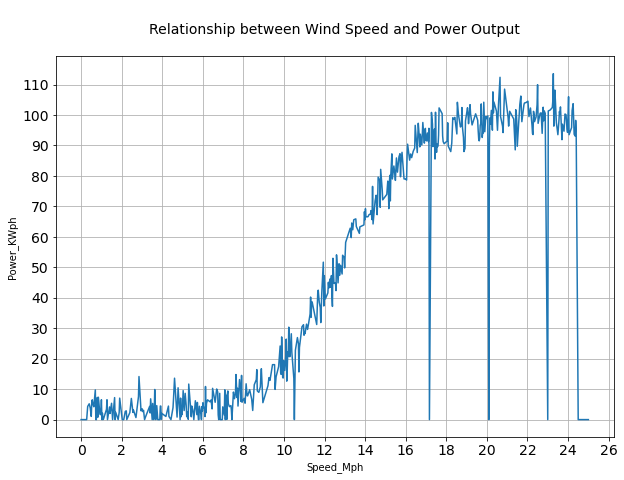

In [15]:
plt.figure(figsize = (10, 7)) 
plt.title('\nRelationship between Wind Speed and Power Output\n', fontsize = 14)
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], size =14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], size =14)
plt.grid(True)
plt.rcParams["axes.labelsize"] = 14
sns.lineplot (x=df.Speed_Mph,y=df.Power_KWph)
plt.show()

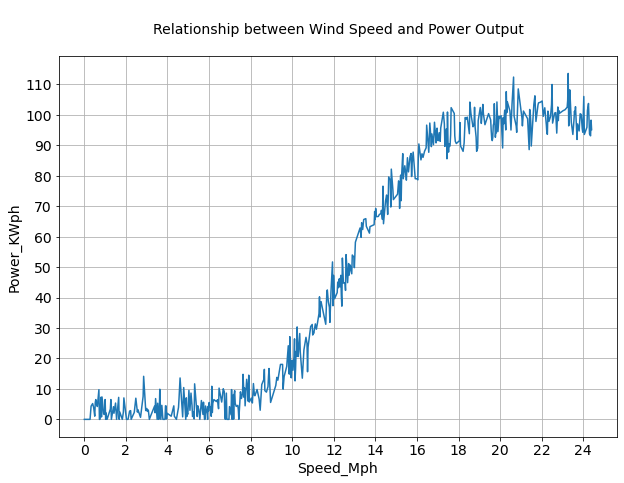

In [16]:
#Plot with assumed 'power outages' removed
plt.figure(figsize = (10, 7)) 
plt.title('\nRelationship between Wind Speed and Power Output\n', fontsize = 14)
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], size =14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], size =14)
plt.grid(True)
plt.rcParams["axes.labelsize"] = 14
sns.lineplot (x=df2.Speed_Mph,y=df2.Power_KWph)
plt.show()

### Commentary:
***

Wind turbines typically start operating at wind speeds around 8-12 miles per hour (mph). Turbines reach maximum power output at 25-30 mph. At very high wind speeds, i.e. 55 mph or greater the wind turbines shut down to prevent excessive wear and tear. 
https://enerpower.ie/portfolio/wind-turbine-faq-ireland/

In [17]:
#If wind speed is higher than 8 and power output is zero, the turbine must have been out of order so these samples should be eliminate.

print("\nSummary of Results:\n")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|  Wind Speed  |   Power Output   | No. of  |          Commentary                                                 |")
print ("|    Range     |      Range       | Samples |                                                                     |")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|     0-8mph   |        0 KWph    |   ",(len(df["Power_KWph"][(df["Speed_Mph"]<=8)&(df["Power_KWph"]==0)])),"  | Zero power output produced at low wind speeds of 0-8 mph")
print ("|     0-8mph   |  0.01-15 KWph    |  ",(len(df["Power_KWph"][(df["Speed_Mph"]>0)&(df["Speed_Mph"]<=8)&(df["Power_KWph"]>0)&(df["Power_KWph"]<=15)])),"  | Flat rate of power output produced relative to increase in wind speed")
print ("|    8-18mph   |    3-103 KWph    |  ",(len(df["Power_KWph"][(df["Speed_Mph"]>8)&(df["Speed_Mph"]<=18)&(df["Power_KWph"]>0)&(df["Power_KWph"]<=103)])),"  | Exponential rate of power output relative to increase in wind speed")
print ("|   18-25mph   |   87-114 KWph    |  ",(len(df["Power_KWph"][(df["Speed_Mph"]>18)&(df["Power_KWph"]>0)&(df["Power_KWph"]<=120)])),"  | Flat rate of power output produced relative to increase in wind speed")
print ("|    8-25mph   |        0 KWph    |   ",(len(df["Power_KWph"][(df["Speed_Mph"]>8)&(df["Power_KWph"]==0)])),"  | Zero power output produced at wind speeds of 8-25mph - Out of order ")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|    Total     |                  |  ",(len(df["Power_KWph"][(df["Speed_Mph"]>=0)&(df["Power_KWph"]>=0)])),"  |                                                                     |")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|\n")



Summary of Results:

|--------------|------------------|---------|---------------------------------------------------------------------|
|  Wind Speed  |   Power Output   | No. of  |          Commentary                                                 |
|    Range     |      Range       | Samples |                                                                     |
|--------------|------------------|---------|---------------------------------------------------------------------|
|     0-8mph   |        0 KWph    |    35   | Zero power output produced at low wind speeds of 0-8 mph
|     0-8mph   |  0.01-15 KWph    |   128   | Flat rate of power output produced relative to increase in wind speed
|    8-18mph   |    3-103 KWph    |   194   | Exponential rate of power output relative to increase in wind speed
|   18-25mph   |   87-114 KWph    |   129   | Flat rate of power output produced relative to increase in wind speed
|    8-25mph   |        0 KWph    |    14   | Zero power output p

Tip speed ratio is recommended to be between 6 and 8 eg. for a grid connected wind turbine with 3 blades, the optimum ratio is suggested as 7. www.mdpi.com

In [18]:
print("\nOutput Efficiency Assessment :\n")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|              |   Power Output   | No. of  |          Commentary                                                 |")
print ("|              |      Range       | Samples |                                                                     |")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|              |          0       |   ",(len(df["Power_KWph"][(df["Power_KWph"]==0)])),"  | Zero power output")
print ("|              |        0-5       |  ",(len(df["Power_KWph"][(df["Power:Speed"]>0)&(df["Power:Speed"]<=6)])),"  | Sub Optimum Wind Speed:Power Output")
print ("|              |        6-8       |    ",(len(df["Power_KWph"][(df["Power:Speed"]>6)&(df["Power:Speed"]<=8)])),"  | Optimum Wind Speed:Power Output")
print ("|              |         8+       |   ",(len(df["Power_KWph"][(df["Power:Speed"]>8)])),"  | > Optimum output")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|              |      Total       |  ",(len(df["Power_KWph"][(df["Speed_Mph"]>=0)&(df["Power_KWph"]>=0)])),"  |                                                                     |")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|\n")



Output Efficiency Assessment :

|--------------|------------------|---------|---------------------------------------------------------------------|
|              |   Power Output   | No. of  |          Commentary                                                 |
|              |      Range       | Samples |                                                                     |
|--------------|------------------|---------|---------------------------------------------------------------------|
|              |          0       |    49   | Zero power output
|              |        0-5       |   439   | Sub Optimum Wind Speed:Power Output
|              |        6-8       |     2   | Optimum Wind Speed:Power Output
|              |         8+       |    10   | > Optimum output
|--------------|------------------|---------|---------------------------------------------------------------------|
|              |      Total       |   500   |                                                       

### More Plots:
***

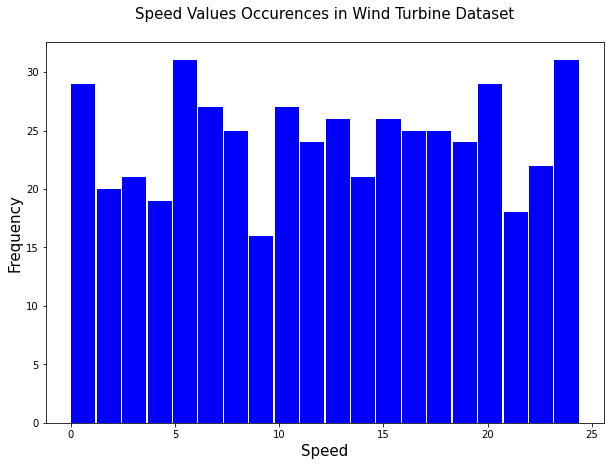

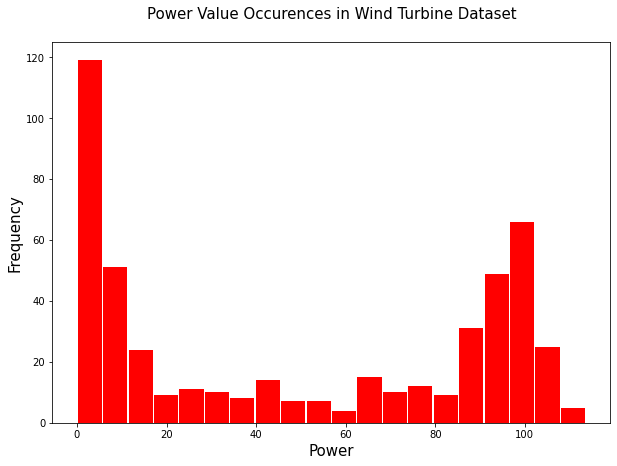

In [19]:
print ("")
plt.figure(figsize = (10, 7)) 
x = df2 ["Speed_Mph"] 
plt.hist(x, bins = 20, color = "blue", rwidth = 0.95) 
plt.title("Speed Values Occurences in Wind Turbine Dataset\n", fontsize = 15) 
plt.xlabel("Speed", fontsize = 15) 
plt.ylabel("Frequency", fontsize = 15) 
plt.show()
print ("")
plt.figure(figsize = (10, 7)) 
x = df2 ["Power_KWph"] 
plt.hist(x, bins = 20, color = "red", rwidth = 0.95) 
plt.title("Power Value Occurences in Wind Turbine Dataset\n", fontsize = 15) 
plt.xlabel("Power", fontsize = 15) 
plt.ylabel("Frequency", fontsize = 15) 
plt.show()

***

### Plot Power and Speed results on the same axis
<BR>

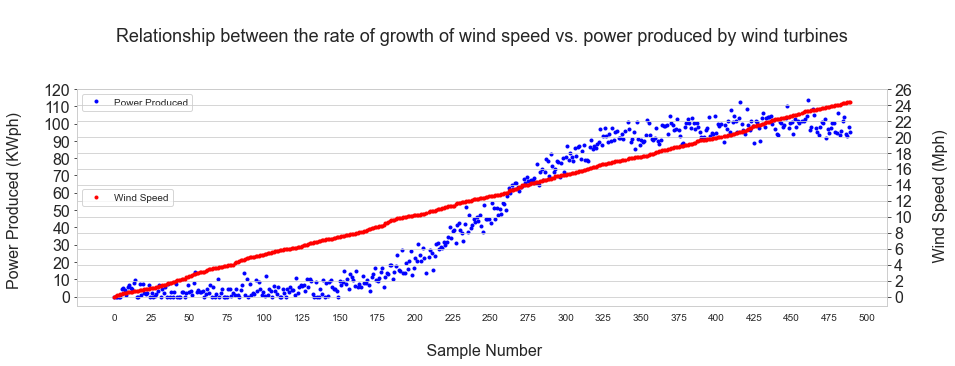

In [20]:
#https://stackoverflow.com/questions/11640243/pandas-plot-multiple-y-axes
plt.rcParams["axes.labelsize"] = 14
sns.set_style ("whitegrid")
fig, ax = plt.subplots()
rspine = ax.spines ['right']
rspine.set_position (('axes', 1))
ax.set_frame_on (True)
ax.patch.set_visible (True)
ax.grid(True)
fig.subplots_adjust(right = 2)
df2.Power_KWph.plot(ax = ax, style = 'b.',label = "Power Produced")
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120],fontsize = 16)
ax.legend(loc = 0)
plt.xlabel("\n Sample Number",fontsize = 16)
plt.ylabel("Power Produced (KWph) \n",fontsize = 16)

# same ax as above since it's automatically added on the right
df2.Speed_Mph.plot(ax = ax, style = 'r.', label = "Wind Speed", secondary_y = True)
plt.yticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26],fontsize = 16)
plt.xticks([0,25, 50,75, 100, 125, 150, 175, 200, 225, 250, 275,300,325,350,375,400,425,450,475,500],fontsize = 16)
plt.ylabel("\n Wind Speed (Mph)",fontsize = 16)
plt.title("\n Relationship between the rate of growth of wind speed vs. power produced by wind turbines \n\n" , fontsize = 18)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.legend (loc = "center left", frameon = True)
bbox_to_anchor=(10, 500)
plt.show()


<BR>

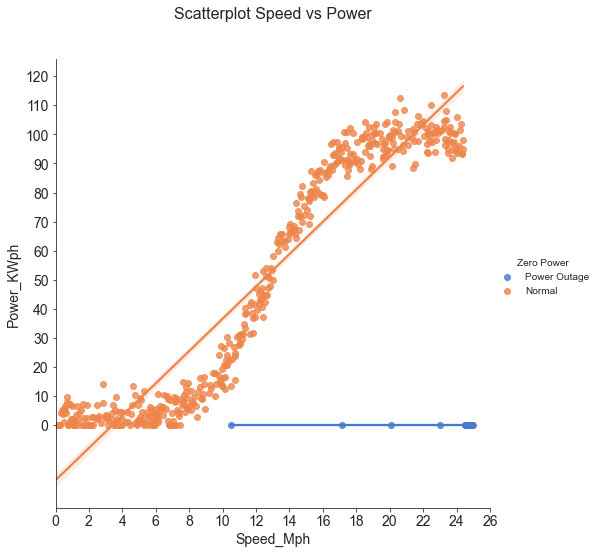

In [21]:
# SCATTERPLOT - WITH REGRESSION LINE
print("")
sns.set_style ("whitegrid")
sns.set_style ("ticks")
sns.lmplot(x="Speed_Mph", y='Power_KWph', hue='Zero Power', palette="muted", height=7, data=df)#use data including power outages
plt.title("Scatterplot Speed vs Power\n\n", fontsize = 16)
plt.rcParams["axes.labelsize"] = 10
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], fontsize = 14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 14)
plt.show()

### Predict expected power based on a given speed
***

In [22]:
#https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

NameError: name 'X' is not defined

In [ ]:
#https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

from collections import Counter
import math

def knn(df2, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(df2):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [df2[i][-1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

def main():
    '''
    # Regression Data
    # 
    # Column 0: Speed (Mph)
    # Column 1: Power (KWph)
    '''
    reg_data = [df2]
    
    # Question:
    # Given the data we have, what's the best-guess of power (KWph) if the turbine is running at 10 (Mph)?
    reg_query = [10]
    reg_k_nearest_neighbors, reg_prediction = knn(reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean
    )
    
if __name__ == '__main__':
    main()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
#label = df2.Power_KWph
features=list(zip(df2.Speed_Mph,df2.Power_KWph)) # combining speed and power into single list of tuples
#print(features)
#print(label)
model.fit(features,df2.Power_KWph)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsClassifier(n_neighbors=3)
# Use only one feature
#df.Power_KWph = df.Power_KWph[:, np.newaxis, 0]

# Split the data into training/testing sets
df2.train = df2.Power_KWph[:250]
df2.test = df2.Power_KWph[250:]

# Split the targets into training/testing sets
df2.Speed_Mph_train = df2.Speed_Mph[:250]
df2.Speed_Mph_test = df2.Speed_Mph[250:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df2.Power_KWph_train, df2.Speed_Mph_train)

# Make predictions using the testing set
df2.Speed_Mph_pred = regr.predict(df2.Power_KWph_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(df2.Speed_Mph_test, df2.Speed_Mph_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(df2.Speed_Mph_test, df2.Speed_Mph_pred))

# Plot outputs
plt.scatter(df2.Power_KWph_test, df2.Speed_Mph_test,  color='black')
plt.plot(df2.Power_KWph_test, df2.Speed_Mph_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#from sklearn import datasets, linear_model
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split
#from sklearn import datasets
#from sklearn import svm
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from sklearn.neighbors import KNeighborsClassifier

Input = np.array(df2['Speed_Mph'])
Inputs = Input.reshape (-1,1) # Convert inputs into a 2D array

Output = (df2['Power_KWph']).astype('int')
Outputs = np.array (Output)

In [ ]:
Knn = nei.KNeighborsClassifier (n_neighbors = 5) # Find a given input and find the 5 nearest neighbors

In [ ]:
Knn.fit(Inputs,Outputs);#Train the Algorithm - give the algorithm known datapoints as reference points

In [ ]:
df.loc[0]
Knn.predict ([[20.345],[4.555],[8.408]]) #Predict output based on 3 samples

In [ ]:
df.loc[3]
Knn.predict ([[0.15]]) #Check the quality of the prediction based on the training data

In [ ]:
(Knn.predict (Inputs) == Outputs) # Returns a 'true' or 'false' value where prediction = the original value

In [ ]:
print((Knn.predict (Inputs) == Outputs).sum) #Convert 'true' values to 1 and 'false' values to 0

In [ ]:
mod.train_test_split (Input,Outputs,test_size = 0.33) #Train the algoritm using 1/3 of the dataset

### Predict expected speed based on a given power
***

<BR>

### End

***

#### End